In [15]:
# Install TensorFlow and all required libraries
%pip install tensorflow numpy matplotlib scikit-learn seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [16]:
# ============================================
# MNIST Digit Classification
# Simple Feedforward Neural Network
# Framework: TensorFlow/Keras
# ============================================

# Section 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

print("TensorFlow version:", keras.__version__)

TensorFlow version: 3.10.0


Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


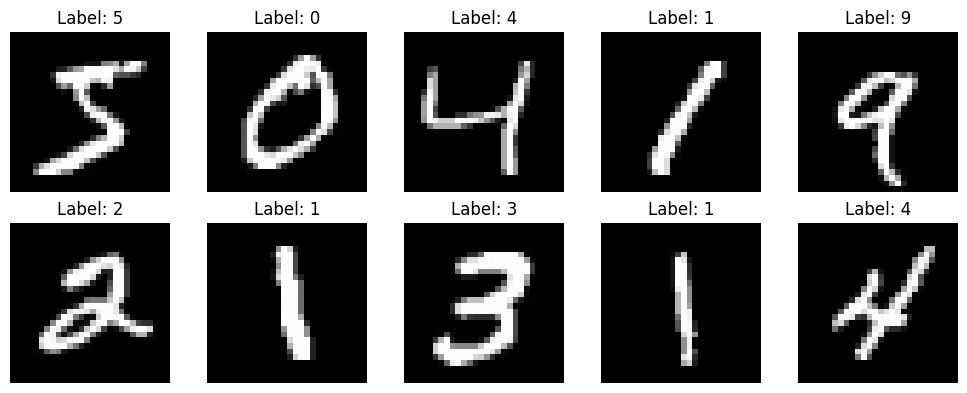

In [6]:
# ============================================
# Section 2: Load and Explore Data
# ============================================

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape:", x_train.shape)  # (60000, 28, 28)
print("Training labels shape:", y_train.shape)  # (60000,)
print("Test data shape:", x_test.shape)  # (10000, 28, 28)
print("Test labels shape:", y_test.shape)  # (10000,)

# Visualize some examples
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
# ============================================
# Section 3: Data Preprocessing
# ============================================

print("\n--- Data Preprocessing ---")

# Step 1: Flatten images from 28x28 to 784
x_train_flat = x_train.reshape(-1, 784)  # -1 means "figure out this dimension"
x_test_flat = x_test.reshape(-1, 784)

print("Flattened training shape:", x_train_flat.shape)  # (60000, 784)
print("Flattened test shape:", x_test_flat.shape)  # (10000, 784)

# Step 2: Normalize pixel values from 0-255 to 0-1
x_train_normalized = x_train_flat.astype('float32') / 255.0
x_test_normalized = x_test_flat.astype('float32') / 255.0

print("Original pixel range:", x_train_flat[0].min(), "-", x_train_flat[0].max())
print("Normalized pixel range:", x_train_normalized[0].min(), "-", x_train_normalized[0].max())

# Step 3: One-hot encode labels
# Before: y_train[0] = 5
# After: y_train_encoded[0] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

print("\nOriginal label:", y_train[0])
print("One-hot encoded label:", y_train_encoded[0])


--- Data Preprocessing ---
Flattened training shape: (60000, 784)
Flattened test shape: (10000, 784)
Original pixel range: 0 - 255
Normalized pixel range: 0.0 - 1.0

Original label: 5
One-hot encoded label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
# ============================================
# Section 4: Build Model Architecture
# ============================================

print("\n--- Building Neural Network ---")

model = keras.Sequential([
    # Input layer (implicit - defined by first hidden layer input shape)
    
    # Hidden Layer 1: 128 neurons with ReLU activation
    layers.Dense(128, activation='relu', input_shape=(784,), name='hidden_layer_1'),
    
    # Hidden Layer 2: 64 neurons with ReLU activation
    layers.Dense(64, activation='relu', name='hidden_layer_2'),
    
    # Output Layer: 10 neurons with Softmax activation
    layers.Dense(10, activation='softmax', name='output_layer')
])

# Display model architecture
model.summary()


--- Building Neural Network ---


/Users/ermi/Desktop/AI:ML/AI-ML-Assignment-3-Simple-NN/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# ============================================
# Section 5: Compile Model
# ============================================

print("\n--- Compiling Model ---")

model.compile(
    optimizer='adam',  # Adam optimizer - smart learning rate adjustment
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)

print("Model compiled successfully!")


--- Compiling Model ---
Model compiled successfully!


In [10]:
# ============================================
# Section 6: Train Model
# ============================================

print("\n--- Training Model ---")

# Train for 10 epochs with 20% validation split
history = model.fit(
    x_train_normalized,
    y_train_encoded,
    epochs=10,
    batch_size=128,
    validation_split=0.2,  # Use 20% of training data for validation
    verbose=1
)


--- Training Model ---
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8022 - loss: 0.6944 - val_accuracy: 0.9489 - val_loss: 0.1803
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9524 - loss: 0.1616 - val_accuracy: 0.9583 - val_loss: 0.1472
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9701 - loss: 0.1069 - val_accuracy: 0.9643 - val_loss: 0.1197
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9772 - loss: 0.0751 - val_accuracy: 0.9717 - val_loss: 0.0972
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9838 - loss: 0.0569 - val_accuracy: 0.9727 - val_loss: 0.0935
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9863 - loss: 0.0478 - val_accuracy: 0.9738 - val_loss: 0.0896
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9891 - loss: 0.0383 - val_accuracy: 0.9736 - val_loss: 0.0972
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9904 - loss: 0

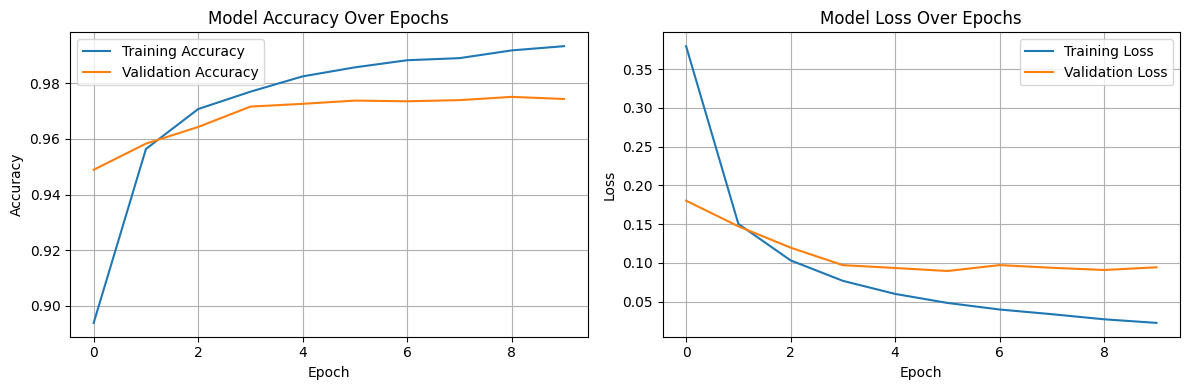

In [11]:
# ============================================
# Section 7: Visualize Training Progress
# ============================================

# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [12]:
# ============================================
# Section 8: Evaluate Model on Test Set
# ============================================

print("\n--- Evaluating Model on Test Set ---")

test_loss, test_accuracy = model.evaluate(
    x_test_normalized,
    y_test_encoded,
    verbose=0
)

print(f"\nFinal Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Final Test Loss: {test_loss:.4f}")


--- Evaluating Model on Test Set ---

Final Test Accuracy: 97.59%
Final Test Loss: 0.0874



--- Testing on Random Images ---

Image 1:
  True Label: 6
  Predicted Label: 6
  Confidence: 99.73%
  Correct: ✓

Image 2:
  True Label: 3
  Predicted Label: 3
  Confidence: 100.00%
  Correct: ✓

Image 3:
  True Label: 1
  Predicted Label: 1
  Confidence: 99.94%
  Correct: ✓

Image 4:
  True Label: 4
  Predicted Label: 4
  Confidence: 99.99%
  Correct: ✓

Image 5:
  True Label: 5
  Predicted Label: 5
  Confidence: 99.99%
  Correct: ✓


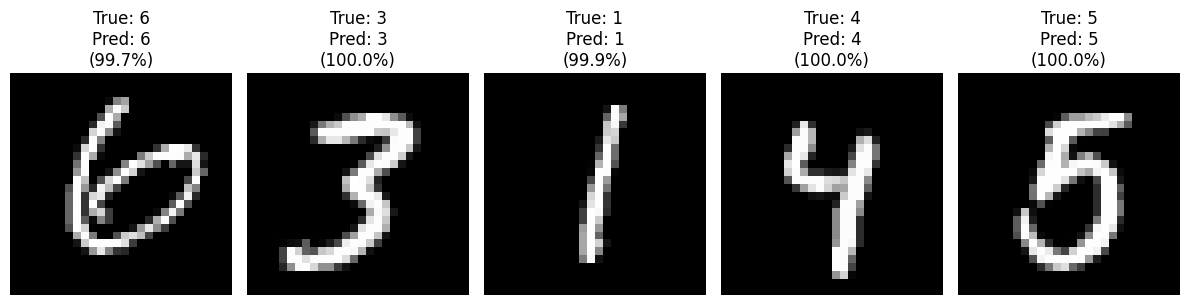

In [13]:
# ============================================
# Section 9: Test on Random Images
# ============================================

print("\n--- Testing on Random Images ---")

# Select 5 random images from test set
num_samples = 5
random_indices = np.random.randint(0, len(x_test), num_samples)

plt.figure(figsize=(12, 4))

for i, idx in enumerate(random_indices):
    # Get image and true label
    image = x_test[idx]
    true_label = y_test[idx]
    
    # Prepare image for prediction
    image_flat = image.reshape(1, 784).astype('float32') / 255.0
    
    # Make prediction
    prediction = model.predict(image_flat, verbose=0)
    predicted_label = np.argmax(prediction)
    confidence = np.max(prediction) * 100
    
    # Display
    plt.subplot(1, num_samples, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {true_label}\nPred: {predicted_label}\n({confidence:.1f}%)")
    plt.axis('off')
    
    # Print detailed info
    print(f"\nImage {i+1}:")
    print(f"  True Label: {true_label}")
    print(f"  Predicted Label: {predicted_label}")
    print(f"  Confidence: {confidence:.2f}%")
    print(f"  Correct: {'✓' if predicted_label == true_label else '✗'}")

plt.tight_layout()
plt.show()

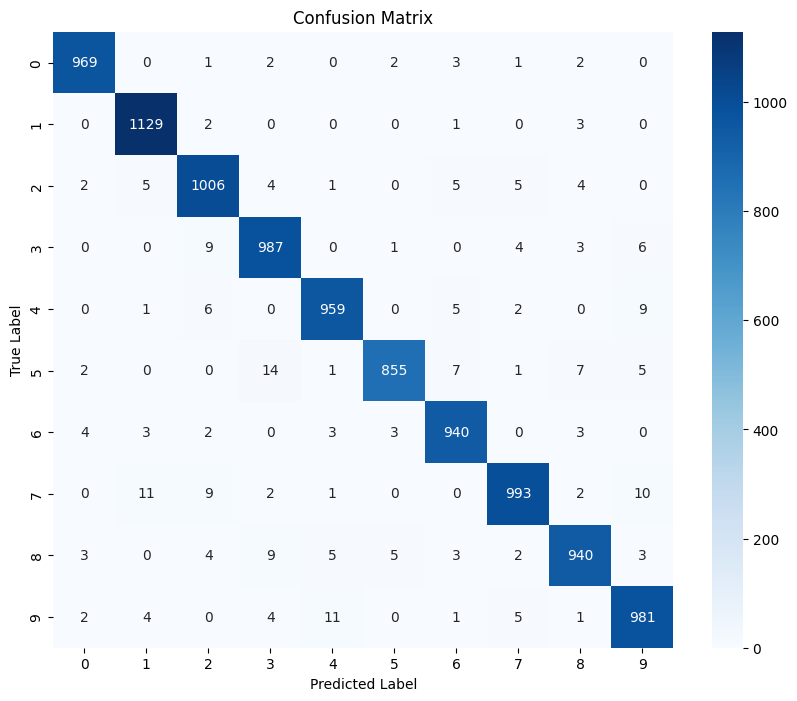


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [14]:
# ============================================
# Section 10: Confusion Matrix (Bonus)
# ============================================

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get predictions for all test images
y_pred = model.predict(x_test_normalized, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred_classes))